In [93]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
# import spacy
# import textacy
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
# import stellargraph as sg
import tensorflow as tf
# from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# from stellargraph import datasets
from IPython.display import display, HTML
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn.metrics import roc_curve, auc

In [101]:
df0 = pd.read_csv("Data/cancer_dataset.csv", encoding='latin1', index_col=0)
df = df0["a"]
df0.head()

,0,a
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [102]:
set(df0['0']), len(df0)

({'Colon_Cancer', 'Lung_Cancer', 'Thyroid_Cancer'}, 7570)

In [42]:
len(df0[df0['0'] == 'Colon_Cancer']), len(df0[df0['0'] == 'Lung_Cancer']), len(df0[df0['0'] == 'Thyroid_Cancer'])

(2580, 2180, 2810)

In [43]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df0['0'])
set(labels)

{0, 1, 2}

In [44]:
#

In [45]:
#nlp = spacy.load("en_core_web_lg")

In [46]:
#

In [47]:
def draw_graph(G):
    plt.figure(figsize=(15,10))

    pos = nx.spring_layout(G, k=1)
    node_color = "skyblue"
    edge_color = "black"

    nx.draw_networkx(G, pos=pos, with_labels=True, node_color=node_color, 
            edge_color=edge_color, 
            node_size=2000, connectionstyle='arc3,rad=0.1')

    nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                             edge_labels=nx.get_edge_attributes(G,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
    plt.show()

In [48]:
with open("Data/graphs.pkl", "rb") as f:
    Gs = pkl.load(f)

In [83]:
G_combined = Gs[0].copy()
for G in Gs[1:]:
    G_combined.update(G)

In [11]:
GG = nx.disjoint_union_all(Gs)

In [13]:
from pyvis.network import Network

net = Network(notebook = True, cdn_resources = "remote",
                bgcolor = "#eeeeee",
                #font_color = "#00FF00",
                height = "1400px",
                directed=True,
                width = "100%",
                select_menu = True,
                filter_menu = True,
)

net.from_nx(Gs[0])
# net.from_nx(GG)

for node in net.nodes:
    node['shape'] = "circle"
    node['color'] = "#00FF00"


html_content = net.generate_html()

with open("KG_with_menu.html", "w", encoding="utf-8") as file:
    file.write(html_content)

# net.show_buttons()
# net.show("KG_with_menu.html");

In [50]:
import matplotlib.font_manager as fm

# Print a list of available font families
# for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(fm.FontProperties(fname=font).get_name())
# plt.rcParams['font.family'] = 'DejaVuSans'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# draw_graph(Gs[1])

In [51]:
degree_dict = dict(G_combined.degree)
sorted_nodes_by_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
highest_degree_node = sorted_nodes_by_degree[0][0]
second_highest_degree_node = sorted_nodes_by_degree[5][0]

In [66]:
# neighbors1 = set(G_combined.neighbors('lung_cancer'))
neighbors1 = []
for node in list(G_combined.neighbors('lung_cancer')):
    neighbors1.extend(list(G_combined.neighbors(node)))
neighbors1 = set(neighbors1)
        
# neighbors2 = set(G_combined.neighbors('thyroid_cancer'))
neighbors2 = []
for node in list(G_combined.neighbors('colon_cancer')):
    neighbors2.extend(list(G_combined.neighbors(node)))
neighbors2 = set(neighbors2)

neighbors1 & neighbors2

{'role'}

In [74]:
degree_dict['colon_cancer']

5

In [103]:
sorted_nodes_by_degree

[('we', 2680),
 ('that', 1757),
 ('which', 1628),
 ('We', 909),
 ('it', 826),
 ('patients', 797),
 ('expression', 737),
 ('study', 664),
 ('role', 648),
 ('they', 588),
 ('who', 581),
 ('studies', 579),
 ('cells', 506),
 ('data', 501),
 ('results', 501),
 ('analysis', 333),
 ('effect', 333),
 ('effects', 329),
 ('number', 290),
 ('authors', 265),
 ('this', 246),
 ('genes', 238),
 ('activity', 228),
 ('patient', 222),
 ('risk', 204),
 ('levels', 197),
 ('This', 185),
 ('It', 173),
 ('use', 169),
 ('treatment', 155),
 ('association', 154),
 ('activation', 151),
 ('findings', 150),
 ('mice', 147),
 ('level', 141),
 ('difference', 137),
 ('information', 136),
 ('i', 135),
 ('increase', 134),
 ('apoptosis', 134),
 ('differences', 132),
 ('response', 130),
 ('factors', 127),
 ('overexpression', 126),
 ('model', 126),
 ('potential', 125),
 ('correlation', 125),
 ('impact', 122),
 ('work', 120),
 ('evidence', 118),
 ('method', 118),
 ('cases', 117),
 ('research', 117),
 ('participants', 117),


In [111]:
inconsistencies_with_degree = pd.Series(dict(sorted_nodes_by_degree))[inconsistent_words]

In [187]:
sum(inconsistencies_with_degree)/len(inconsistent_words)

84.08071996399268

In [141]:
degree_centrality = nx.degree_centrality(G_combined)
j = 0
for inconsistent_word in tqdm(inconsistent_words):
    j += degree_centrality[inconsistent_word]
j/len(inconsistent_words)

100%|█████████████████████████████████████████████████████████████████████| 657644/657644 [00:00<00:00, 1716745.71it/s]


0.0013852783072654214

In [190]:
j = 0
k = 0
for word, value in tqdm(degree_centrality.items()):
    if word not in inconsistent_words:
        j += value
        k += 1
        
j/k

100%|████████████████████████████████████████████████████████████████████████████| 60200/60200 [10:43<00:00, 93.51it/s]


2.0561424796390462e-05

In [142]:
eigenvector_centrality = nx.eigenvector_centrality(G_combined)

In [167]:
j = 0
temp_inconsistent = []
for inconsistent_word in tqdm(inconsistent_words):
    j += eigenvector_centrality[inconsistent_word]
    temp_inconsistent.append((inconsistent_word, eigenvector_centrality[inconsistent_word]))
j/len(inconsistent_words)

100%|██████████████████████████████████████████████████████████████████████| 657644/657644 [00:00<00:00, 821661.29it/s]


0.017054374067364823

In [170]:
temp_consistent = {k: v for k, v in tqdm(eigenvector_centrality.items()) if k not in inconsistent_words}

print(temp_consistent)

100%|███████████████████████████████████████████████████████████████████████████| 60200/60200 [04:39<00:00, 215.59it/s]

{'presentedMAIN': 9.148819220060914e-58, 'MEASURES_Indications': 9.148819220060914e-58, 'thyroid_surgery': 0.0011075402231842013, 'thyroidectomy_procedures': 0.0011075402231842013, 'Sixtysix_patients': 0.0005253840276496832, 'thyroid_surgery_Specific_data': 0.0004734482721133418, 'Specific_data': 0.0004734482721133418, 'thyroidectomy_Surgeries': 8.263922883666513e-55, 'adult_surgeon_surgeon': 1.1686951820486561e-54, 'nerve_monitoring': 8.263922883666513e-55, 'series_procedures': 9.370878031379284e-06, 'endocrine_surgeons': 0.0005744186125156013, 'surgeons_endocrine_surgeons': 0.000426827576725533, 'Transient_hypocalcemia': 9.370878031379284e-06, 'preoperative_cords_assessment': 0.001845170519318405, 'completion_thyroidectomy': 0.0011075402231842013, 'using_the_t_test_for_continuous_data_and_the_chisquare_or_Fisher_exact_tests_for_proportionsRESULTSBetween_   _and_     ': 0.0015677370595522013, 'Eightyone_patients': 7.355661289455479e-06, 'thyroid_cancer_goiter_Table_Indications': 0.000

In [173]:
sorted(temp_consistent.items(), key=lambda x: x[1], reverse=True)

[('ferroptosis', 0.015043906820768178),
 ('distributions', 0.014790379321251233),
 ('circRNAs', 0.014448418712648398),
 ('ers', 0.012947162597569449),
 ('cancer_cohorts', 0.012028681380063992),
 ('rnnmodel', 0.012028681380063992),
 ('dner', 0.011848467123284313),
 ('lbx2as1_expression', 0.011672185603023811),
 ('spheroids', 0.011499572565104511),
 ('CDKN2BAS1', 0.010705393278262195),
 ('tam', 0.010541402393443922),
 ('DRPT', 0.010436175505281345),
 ('igg4', 0.01023715389257993),
 ('GBM_cells', 0.010110825939499172),
 ('a0µM_a0µM', 0.010101169564734799),
 ('PAX9', 0.009882348354128045),
 ('bridge_teeth_typicalnumber', 0.009827085960189955),
 ('ers_levels', 0.009730556774261514),
 ('emt', 0.0095239722193556),
 ('to_be_a_previously_unrecognized_immune_evasion_mechanism_with_igg4_playing_an_essential_role_in_cancer_microenvironment_with_implications_in_cancer_diagnosis_and_immunotherapyintroductionwhile_ _new_ _immune_ _therapy_ _for_ _cancer_promise_structure',
  0.009493919326339055),
 (

In [180]:
sum(temp_consistent.values())/len(temp_consistent.values())

0.0006867520573417544

In [168]:
sorted(dict(temp_inconsistent).items(), key=lambda x: x[1], reverse=True)

[('we', 0.4732416428937844),
 ('that', 0.26454752349715543),
 ('which', 0.23788300121179723),
 ('We', 0.1464011597480411),
 ('it', 0.12889604445368286),
 ('study', 0.11721230219377587),
 ('patients', 0.11305919164611887),
 ('studies', 0.11033650565694238),
 ('expression', 0.10299679515790358),
 ('results', 0.10097976117828672),
 ('role', 0.09706814032731957),
 ('data', 0.08955054839308735),
 ('they', 0.08507985526193458),
 ('analysis', 0.06921717789344078),
 ('effect', 0.06910874864259489),
 ('cells', 0.06816011329000488),
 ('who', 0.06788386786863042),
 ('this', 0.06325459965544457),
 ('number', 0.06308485655135503),
 ('effects', 0.06167930125675183),
 ('genes', 0.05799012863100883),
 ('findings', 0.054040223839345605),
 ('association', 0.052562337822024345),
 ('levels', 0.05220111673134135),
 ('authors', 0.0487527760763784),
 ('use', 0.048734802684679536),
 ('risk', 0.048160706206199104),
 ('information', 0.0468015420585386),
 ('evidence', 0.04672383284573723),
 ('treatment', 0.04367

In [184]:
sum(dict(temp_inconsistent).values())/len(dict(temp_inconsistent).values())

0.001184022710969853

In [104]:
highest_degree_node = 'lung_cancer'
second_highest_degree_node = 'role'

C:\Users\pouri\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pouri\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pouri\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


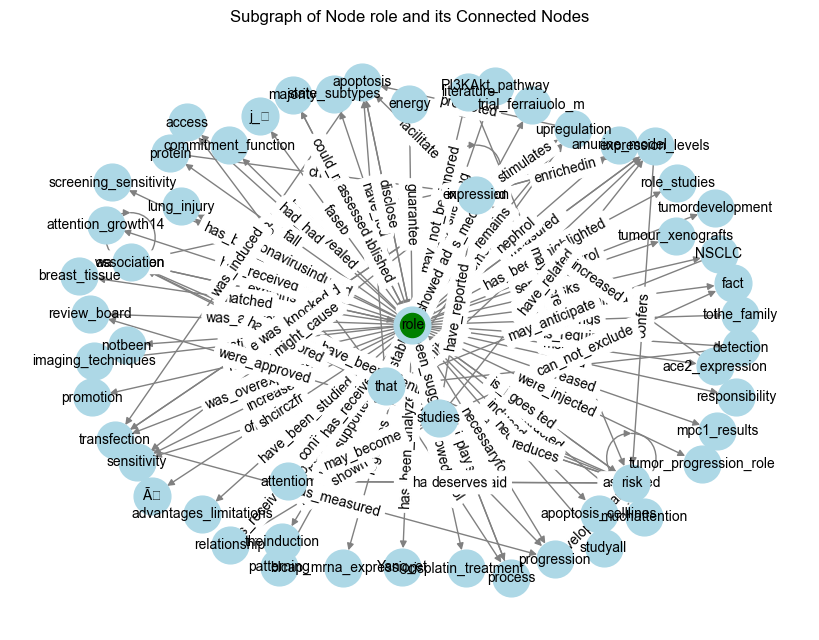

In [68]:
neighbors = list(G_combined.neighbors(second_highest_degree_node))

# Create the subgraph consisting of the second highest degree node and its neighbors
subgraph_nodes = [second_highest_degree_node]
for n in neighbors:
    if len(n) < 25:
        subgraph_nodes += [n]
# subgraph_nodes = [second_highest_degree_node] + neighbors
subgraph = G_combined.subgraph(subgraph_nodes)

# Draw the subgraph
pos = nx.spring_layout(subgraph, k=1.5, iterations=50)  # positions for all nodes

plt.figure(figsize=(8, 6))
nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', edge_color='gray')

# Highlight the second highest degree node
nx.draw_networkx_nodes(subgraph, pos, nodelist=[second_highest_degree_node], node_color='green')

edge_labels = nx.get_edge_attributes(subgraph, 'relation')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

plt.title(f"Subgraph of Node {second_highest_degree_node} and its Connected Nodes")
plt.show()

In [84]:
G_combined = G_combined.to_undirected()

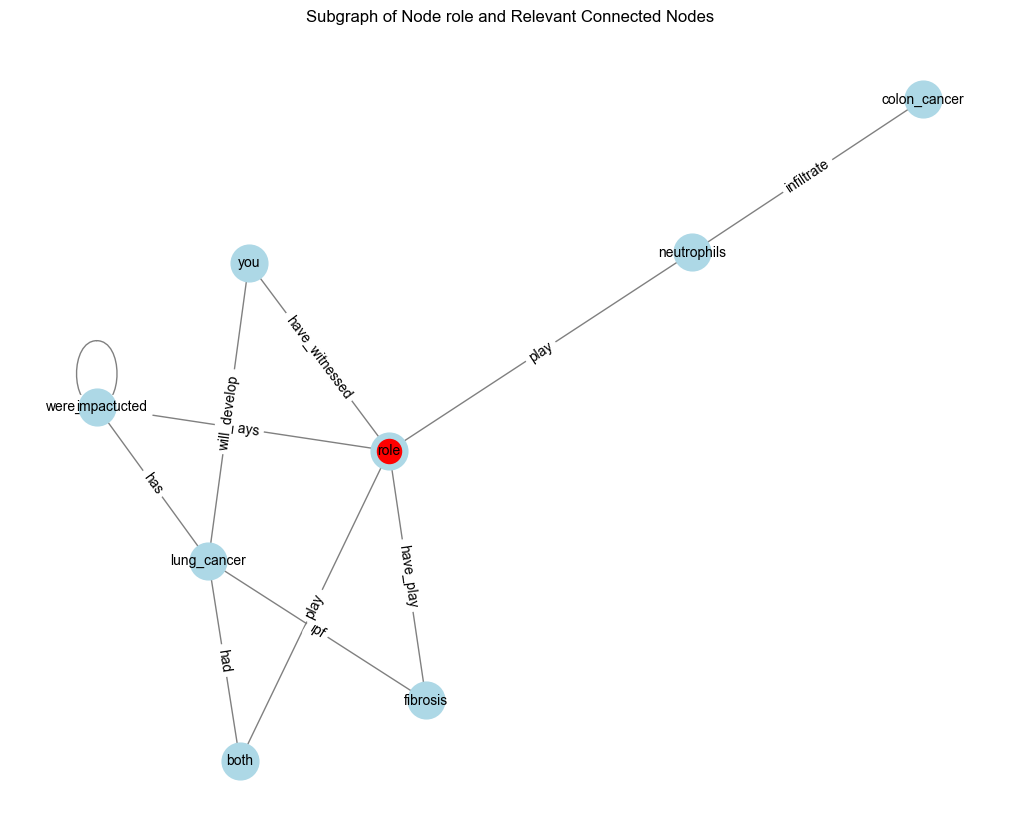

In [86]:
# Find the node with the highest degree
highest_degree_node = 'role'

# Get the neighbors of the highest degree node
neighbors = list(G_combined.neighbors(highest_degree_node))

# Nodes to include in the subgraph
subgraph_nodes = {highest_degree_node}

test = []

# Include neighbors that have other connections and those connected nodes
for neighbor in neighbors:
    if len(neighbor)<25:
        other_connections = list(set(G_combined.neighbors(neighbor)) - {highest_degree_node})
        if other_connections:
            for con in other_connections:
                if len(con)<25 and (con=='colon_cancer' or con=='lung_cancer'):
                    subgraph_nodes.add(neighbor)
                    subgraph_nodes.update([con])

# Create the subgraph
subgraph = G_combined.subgraph(subgraph_nodes)

# Draw the subgraph
pos = nx.spring_layout(subgraph)  # positions for all nodes

plt.figure(figsize=(10, 8))
nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', edge_color='gray')

# Highlight the highest degree node
nx.draw_networkx_nodes(subgraph, pos, nodelist=[highest_degree_node], node_color='red')

edge_labels = nx.get_edge_attributes(subgraph, 'relation')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels)

plt.title(f"Subgraph of Node {highest_degree_node} and Relevant Connected Nodes")
plt.show()

In [88]:
from pyvis.network import Network

net = Network(notebook = True, cdn_resources = "remote",
                bgcolor = "#eeeeee",
                #font_color = "#00FF00",
                height = "1400px",
                directed=True,
                width = "100%",
                select_menu = True,
                filter_menu = True,
)

# net.from_nx(subgraph)

for node, data in subgraph.nodes(data=True):
    net.add_node(node, label=str(node), **data)

for u, v, data in subgraph.edges(data=True):
    edge_label = f"r: {data['relation']}"
    net.add_edge(u, v, title=edge_label, **data)
    
for node in net.nodes:
    node['shape'] = "circle"
    node['color'] = "#00FF00"
    if node['label'] == highest_degree_node:
        node['color'] = "#FFFFFF"
    
net.set_options("""
var options = {
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.005,
      "springLength": 200,
      "springConstant": 0.08
    },
    "maxVelocity": 146,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
    "stabilization": {
      "enabled": true,
      "iterations": 150
    }
  }
}
""")


html_content = net.generate_html()

with open("KG_subgraph_with_menu.html", "w", encoding="utf-8") as file:
    file.write(html_content)

# net.show_buttons()
# net.show("KG_with_menu.html");

In [12]:
word_dict = {}
i = 0
for G in Gs:
    for node in list(G.nodes):
        word_dict[i] = node
        i += 1

In [13]:
with open("Data/combined_graphed.pkl", "rb") as f:
    node_vectors_list_cmb = pkl.load(f)
word_vec_dict = {}
for i, node in enumerate(list(GG.nodes)):
    word_vec_dict[node] = node_vectors_list_cmb[0][i]

In [14]:
with open("Data/individual_graphed.pkl", "rb") as f:
    node_vectors_list_ind = pkl.load(f)

In [15]:
len_each_graph = [len(i) for i in node_vectors_list_ind]
print(len_each_graph[:20])

[88, 76, 91, 90, 117, 125, 94, 106, 188, 203, 182, 170, 167, 183, 203, 45, 144, 185, 182, 161]


In [16]:
vec_list = np.array(node_vectors_list_cmb[0])
len(vec_list)

1009270

In [17]:
# Classification

In [18]:
labels_extended = []
for i, l in enumerate(len_each_graph):
    labels_extended.extend([labels[i]]*l)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    vec_list, labels_extended, test_size=0.1
)

In [20]:
#model = LinearSVC()
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.4820216592190395
F1 Score: 0.5294615838586663


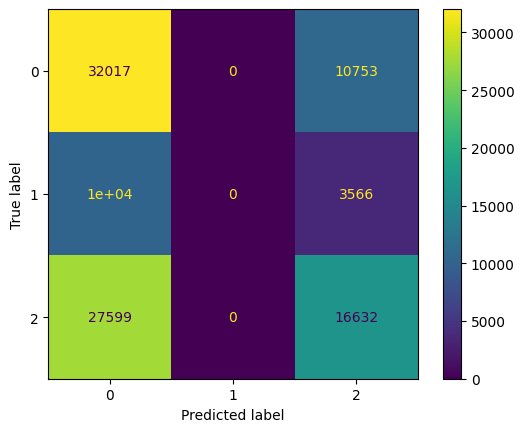

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [23]:
#y_probs = model.predict_proba(X_test)
#fpr, tpr, thresholds = roc_curve(y_test, y_probs)
#roc_auc = auc(fpr, tpr)
#plt.figure()
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic Example')
#plt.legend(loc="lower right")
#plt.show()

In [24]:
# Classification on whole data
model = GaussianNB()
model.fit(vec_list, labels_extended)

y_pred = model.predict(vec_list)

y_pred_reduced = []
cumsum_len_each_graph = np.cumsum(len_each_graph)
for i in range(len(cumsum_len_each_graph)):
    if i==0:
        y_pred_reduced.append(np.argmax(np.bincount(y_pred[:cumsum_len_each_graph[i]])))
    else:
        y_pred_reduced.append(np.argmax(np.bincount(y_pred[cumsum_len_each_graph[i-1]:cumsum_len_each_graph[i]])))

accuray = accuracy_score(y_pred_reduced, labels)
f1 = f1_score(y_pred_reduced, labels, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)        

Accuracy: 0.4095112285336856
F1 Score: 0.48479871972121086


In [25]:
#

In [26]:
def linear_assignment(cost_matrix):
    try:
        import lap
        _, x, y = lap.lapjv(cost_matrix, extend_cost=True)
        return np.array([[y[i], i] for i in x if i >= 0])
    except ImportError:
        from scipy.optimize import linear_sum_assignment
        x, y = linear_sum_assignment(cost_matrix)
        return np.array(list(zip(x, y)))

def map_labels(true_labels, pred_labels, cluster_no):
    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)
    cost_matrix = np.zeros((cluster_no, cluster_no))
    for i in range(cluster_no):
        for j in range(cluster_no):
            cost_matrix[i][j] = np.sum((true_labels == i) & (pred_labels == j))
    
    mapping = linear_assignment(-cost_matrix)[:, 1]
    d = {}
    for i, j in enumerate(mapping):
        d[i] = j
    return d

In [27]:
with open("Data/topics_clf_test.pickle", "rb") as f:
    topics = pkl.load(f)
topics = np.array(topics)
topics = topics + 1

In [28]:
topics_extended = []
for i, l in enumerate(len_each_graph):
    topics_extended.extend([topics[i]]*l)

In [29]:
mappings = map_labels(labels_extended, topics_extended, 3)
y = [mappings[val] for val in topics_extended]

In [30]:
differences_index = []
for i, l in enumerate(labels_extended):
    if l != y[i]:
        differences_index.append(i)
len(differences_index)

657644

In [31]:
vec_list_reduced = np.delete(vec_list, differences_index, axis=0)
bert_reduced = np.delete(y, differences_index)
labels_extended_reduced = np.delete(labels_extended, differences_index)

In [32]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    vec_list_reduced, labels_extended_reduced, test_size=0.3
)

In [33]:
# model_r = LinearSVC()
model_r = GaussianNB()
model_r.fit(X_train_r, y_train_r)

GaussianNB()

In [34]:
y_pred_r = model_r.predict(X_test_r)
accuray = accuracy_score(y_pred_r, y_test_r)
f1 = f1_score(y_pred_r, y_test_r, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5760465645381465
F1 Score: 0.5921113324562108


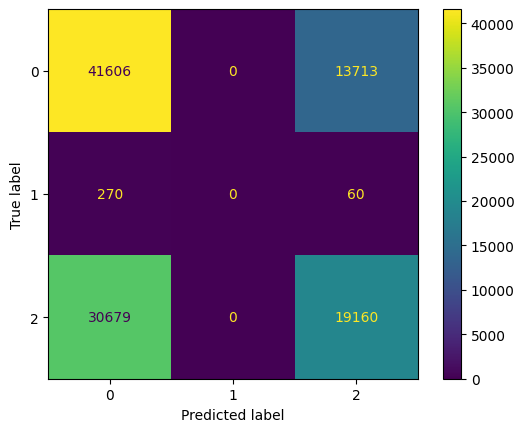

In [35]:
conf_matrix = confusion_matrix(y_test_r, y_pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

In [36]:
inconsistent_words = []
for i in differences_index:
    inconsistent_words.append(word_dict[i])

In [62]:
'role' in inconsistent_words

True

In [89]:
inconsistent_words

['query',
 'keywords_query_QPub_indexed',
 'that',
 'citation_subsets',
 'research_areas_Zoology_etc_research_areas_papers_domainIMIA_Yearbook',
 'research_areas_Zoology_etc_research_areas',
 'papers',
 'section_editors',
 'to_be_caught_by_the_two_PubMed_queriesA_ _first_ _review_ _of_ _the_ _four_ _subsets_ _of_retrieved_ _citations_ ',
 'Yearbook_editorial_committee',
 'papers_domainIMIA_Yearbook',
 'screening',
 'editors_to_achieve_a_final_selection_of_ _candidate_best_ _papers',
 'review',
 'three',
 'which',
 'to_represent_complex_guidelines_They_promote_the_formalism_of_clinical_decision',
 'They',
 'formalism',
 'disambiguation',
 'specification',
 'authors',
 'ambiguity',
 'it',
 'modeling_guidelines',
 'dimensions',
 'levels_dosage_adaptation_intolerance_management',
 'they',
 'modeling',
 'knowledge',
 'Khalifa',
 'CDSS',
 'It',
 'assessment',
 'implementation',
 'effectiveness_safety',
 'qualitative',
 'direction',
 'methodology',
 'works',
 'to_be_cited_Some_of_them_deal_wi

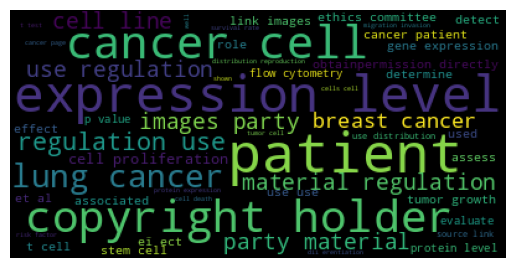

In [38]:
import wordcloud
wc = wordcloud.WordCloud(background_color='black', max_words=50, max_font_size=45)
wc = wc.generate('_'.join(inconsistent_words).replace('_', ' '))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

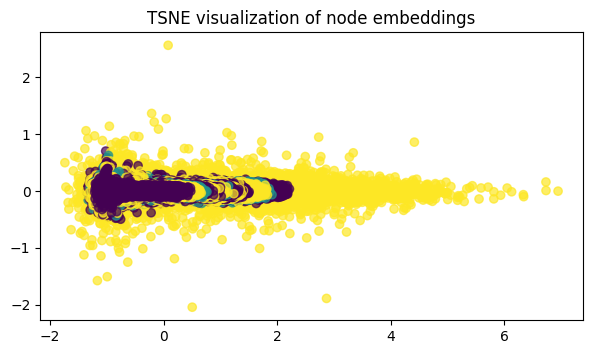

In [31]:
transform = TSNE  # PCA

trans = PCA(n_components=2)
node_embeddings_2d = trans.fit_transform(vec_list)
alpha = 0.7

plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=labels_extended,
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

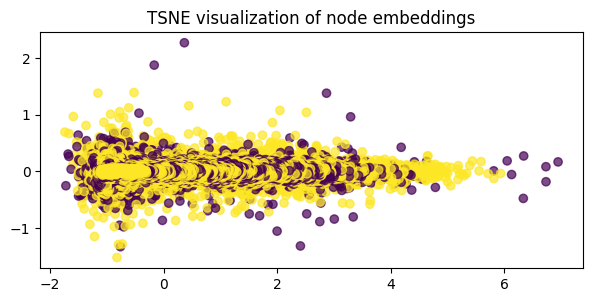

In [85]:
colors = np.zeros(len(vec_list))
colors[differences_index] = 1

transform = TSNE  # PCA

trans = PCA(n_components=2)
node_embeddings_2d = trans.fit_transform(vec_list)
alpha = 0.7

plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=colors,
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

In [60]:
# t-test

In [92]:
res_accuracy = []
res_f1 = []
for i in range(30):
    deleted_indices = np.random.randint(len(vec_list), size=len(differences_index))
    #vec_list_reduced = np.array([l for i, l in enumerate(vec_list) if i not in deleted_indices])
    vec_list_reduced = np.delete(vec_list, deleted_indices, axis=0)
    labels_extended_reduced = np.delete(labels_extended, deleted_indices)
    
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
        vec_list_reduced, labels_extended_reduced, test_size=0.3
    )
    
    model_r = GaussianNB()
    model_r.fit(X_train_r, y_train_r)
    
    y_pred_r = model_r.predict(X_test_r)
    accuray = accuracy_score(y_pred_r, y_test_r)
    f1 = f1_score(y_pred_r, y_test_r, average="weighted")
    
    res_accuracy.append(accuray)
    res_f1.append(f1)

In [94]:
t_stat_accuracy, p_value_accuracy = stats.ttest_1samp(res_accuracy, 0.57)
t_stat_f1, p_value_f1 = stats.ttest_1samp(res_f1, 0.58)
print("T statistic for accuracy:", t_stat_accuracy)
print("P-value for accuracy:", p_value_accuracy)
print("T statistic for f1:", t_stat_f1)
print("P-value for f1:", p_value_f1)

# Setting significance level
alpha = 0.05

if p_value_accuracy < alpha and p_value_f1 < alpha:
    print("Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.")

T statistic for accuracy: -521.2281049023396
P-value for accuracy: 3.778430622877943e-59
T statistic for f1: -297.60719495848565
P-value for f1: 4.306400765362055e-52
Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.
